<a href="https://colab.research.google.com/github/roshniharinkhede/machine-learning/blob/main/Ridge_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
dataset = pd.DataFrame(df.data)
     

dataset.columns = df.feature_names
     

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X = dataset
Y = df.target

In [6]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=42)

In [9]:

## standardizing the dataset

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
     

In [11]:
X_train = scaler.fit_transform(X_train)
     

X_test = scaler.transform(X_test)

In [12]:

X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [13]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

In [14]:
from sklearn.linear_model import LinearRegression

     

In [15]:
regression =  LinearRegression()
     

regression.fit(X_train,Y_train)
     
LinearRegression()

LinearRegression()

In [16]:
## cross validation
from sklearn.model_selection import cross_val_score

In [17]:
#mse = mean_squared_error
mse =  cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
     

mse

array([-24.85792467, -32.34889563, -29.41534458, -18.46226827,
       -24.80445401])

In [18]:
# mean of neg_mean_squared_error
     

np.mean(mse)

-25.977777430926288

In [19]:
## prediction
reg_pred = regression.predict(X_test)
     

reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

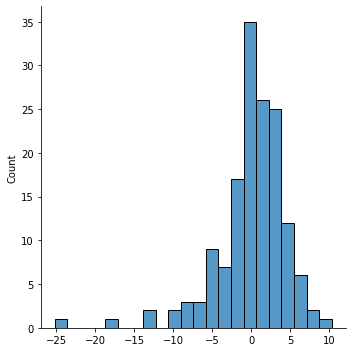

In [20]:
## we have to compare predicted value(reg_pred)with truth value(Y_test)
     

import seaborn as sns
     

sns .displot(reg_pred-Y_test)
     

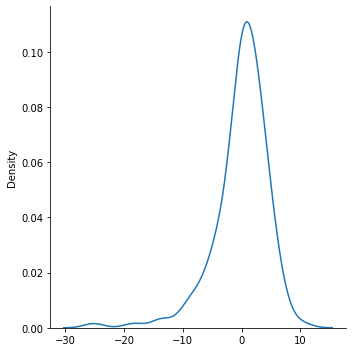

In [21]:
sns .displot(reg_pred-Y_test,kind='kde')

In [22]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred,Y_test)
     

score

0.6693702691495591

Ridge regression algorithm

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV   ## for cross validation

In [24]:
ridge_regressor = Ridge  ()

In [25]:
ridge_regressor

Ridge()

In [27]:
parameters ={'alpha':[1,2,5,10,20,30,40,60,70,80]}
ridgecv= GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 60, 70, 80]},
             scoring='neg_mean_squared_error')

In [28]:
print(ridgecv.best_params_)

{'alpha': 10}


In [29]:
print(ridgecv.best_score_)

-25.80722882229149


In [30]:
ridgecv_pred=ridgecv.predict(X_test)

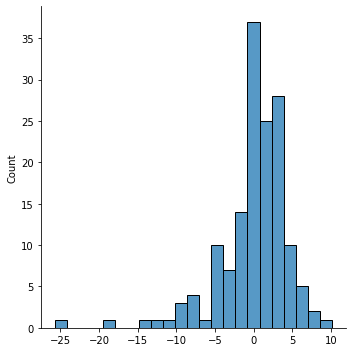

In [31]:
import seaborn as sns
     

sns .displot(ridgecv_pred-Y_test)

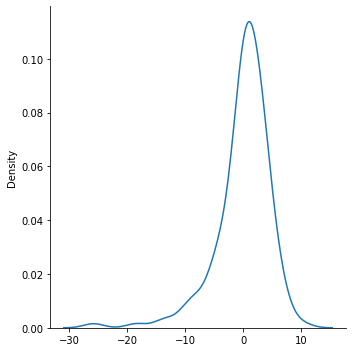

In [33]:
import seaborn as sns
     

sns .displot(ridgecv_pred-Y_test)

In [34]:
from sklearn.metrics import r2_score
score = r2_score(ridgecv_pred,Y_test)
     

In [35]:
score

0.6468557055633644

In [37]:
from matplotlib.widgets import Lasso
## lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()

In [38]:
parameters ={'alpha':[1,2,5,10,20,30,40,60,70,80]}
lassocv= GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 60, 70, 80]},
             scoring='neg_mean_squared_error')

In [39]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-31.153603752119004


In [40]:
lassocv_pred=lassocv.predict(X_test)

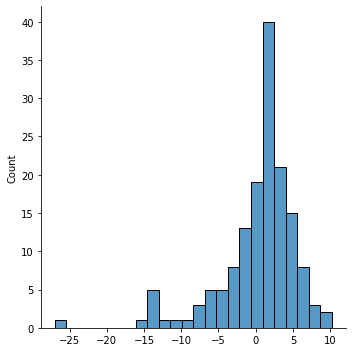

In [41]:
import seaborn as sns
     

sns .displot(lassocv_pred-Y_test)

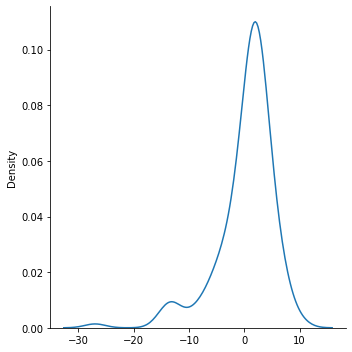

In [43]:
sns .displot(lassocv_pred-Y_test,kind='kde')

In [44]:
from sklearn.metrics import r2_score
score = r2_score(lassocv_pred,Y_test)

In [45]:
score

0.325774612295165